<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2

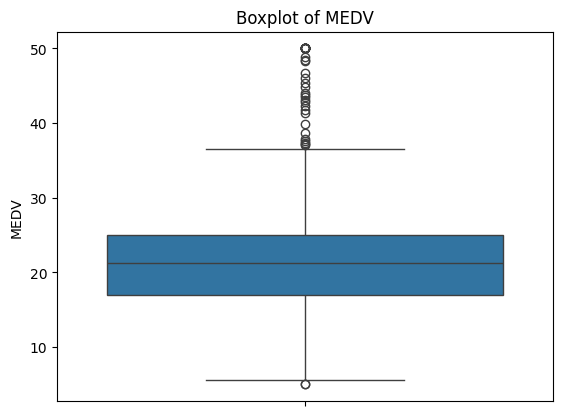

In [13]:
#For the "Median value of owner-occupied homes" provide a boxplot
# Create the boxplot for the MEDV column
sns.boxplot(data=boston_df, y='MEDV')

# Add labels and title
pyplot.title('Boxplot of MEDV')
pyplot.ylabel('MEDV')

# Show the plot
pyplot.show()

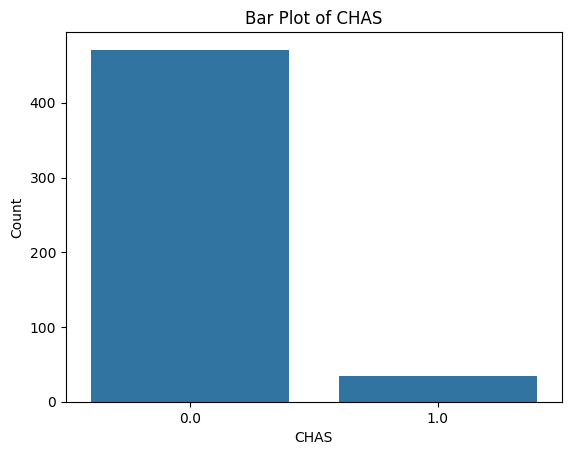

In [14]:
# Create the bar plot for the CHAS column
sns.countplot(data=boston_df, x='CHAS')

# Add labels and title
pyplot.title('Bar Plot of CHAS')
pyplot.xlabel('CHAS')
pyplot.ylabel('Count')

# Show the plot
pyplot.show()

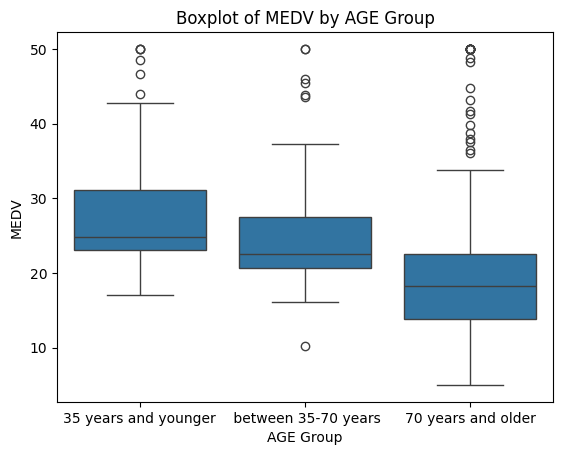

In [16]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# Discretize the AGE column into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', ' between 35-70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Create the boxplot
sns.boxplot(data=boston_df, x='AGE_group', y='MEDV')

# Add labels and title
pyplot.title('Boxplot of MEDV by AGE Group')
pyplot.xlabel('AGE Group')
pyplot.ylabel('MEDV')

# Show the plot
pyplot.show()

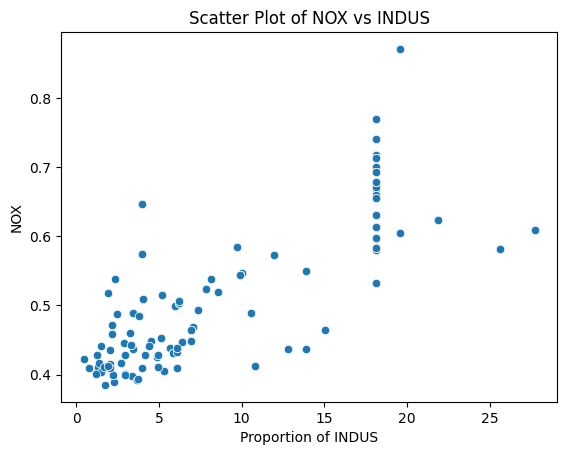

In [17]:
# Provide a scatter plot to show the relationship between 
# Nitric oxide concentrations and the proportion of non-retail business acres per town.
# Create the scatter plot
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')

# Add labels and title
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of INDUS')
pyplot.ylabel('NOX')

# Show the plot
pyplot.show()

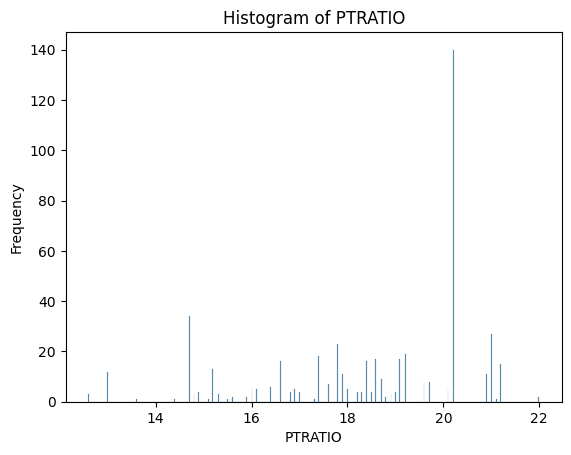

In [21]:
# Create a histogram for the pupil to teacher ratio variable

# Create the histogram
sns.histplot(data=boston_df, x='PTRATIO', bins=len(boston_df), kde=False)

# Add labels and title
pyplot.title('Histogram of PTRATIO')
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Frequency')

# Show the plot
pyplot.show()

# Task 3

In [31]:
# To answer the first question
# Is there a significant difference in median value of houses bounded by the Charles river or not?
# (T-test for independent samples)
# Null Hypothesis (H₀): There is no significant difference in the median value of houses (MEDV)
#    bounded by the Charles River (CHAS=1) and those not bounded by the river (CHAS=0).
# Alternative Hypothesis (H₁): There is a significant difference in the median value of houses (MEDV)
#    based on whether they are bounded by the Charles River.

alpha = 0.05
# Split the data into two groups based on CHAS
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform an independent t-test
# Assume unequal variances
t_stat, p_value = scipy.stats.ttest_ind(chas_1, chas_0, equal_var=False) 

# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles River.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median value of houses bounded by the Charles River.")

T-statistic: 3.113291312794837, P-value: 0.003567170098137517
Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles River.


In [32]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units
# built prior to 1940 (AGE)? (ANOVA)
# Null Hypothesis (H₀): There is no significant difference in the median value of houses (MEDV)
#    across different age groups.
# Alternative Hypothesis (H₁): There is a significant difference in the median value of houses (MEDV)
#    across different age groups.

# Discretize AGE into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', '35-70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Group MEDV by AGE_group
group1 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '35-70 years']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

# Perform one-way ANOVA
f_stat, p_value = scipy.stats.f_oneway(group1, group2, group3)

# Print results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values of houses across age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values of houses across age groups.")

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in median values of houses across age groups.


In [33]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and
# proportion of non-retail business acres per town? (Pearson Correlation)
# Null Hypothesis (H₀): There is no correlation between NOX and INDUS.
# Alternative Hypothesis (H₁): There is a correlation between NOX and INDUS.

# Perform Pearson correlation
corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print results
print(f"Pearson Correlation Coefficient: {corr}, P-value: {p_value}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a significant correlation between NOX and INDUS.


In [34]:
# What is the impact of an additional weighted distance to the five Boston employment centres
# on the median value of owner occupied homes? (Regression analysis)
# Null Hypothesis (H₀): The weighted distance to employment centers (DIS)
#     has no impact on the median value of homes (MEDV).
# Alternative Hypothesis (H₁): The weighted distance to employment centers (DIS)
#     has an impact on the median value of homes (MEDV).

# Define the independent (X) and dependent (y) variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Conclusion
p_value = model.pvalues['DIS']
if p_value <alpha:
    print("Reject the null hypothesis: DIS has a significant impact on MEDV.")
else:
    print("Fail to reject the null hypothesis: DIS does not have a significant impact on MEDV.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        14:56:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0